In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from path import Path
from sklearn.ensemble import RandomForestClassifier

In [56]:
#load the file
df = pd.read_csv("source/joined_vaccine_dataset.csv")
df

,completeness_pct,metro_status,series_complete_pop_pct,series_complete_yes,series_complete_pop_pct_svi,series_complete_pop_pct_ur_equity,masks_order_code,fips_code,county_name,svi_category,social_vulnerability_index_svi,cvac_level_of_concern,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,percent_hispanic,percent_non_hispanic_american_indian_alaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hspanic_native_hawaiian_or_pasific_islander,percent_non_hispanic_white
0,0.0,Non-metro,NaN,NaN,NaN,NaN,1,15007,"Kauai County, Hawaii",Low Vulnerability,0.31,Very Low Concern,NaN,0.1105,0.0036,0.3107,0.0040,0.0804,0.2952
1,96.4,Non-metro,27.2,2958.0,5.0,5.0,2,37029,"Camden County, North Carolina",Low Vulnerability,0.31,Low Concern,0.338,0.0292,0.0000,0.0179,0.1384,0.0012,0.8046
2,91.7,Non-metro,19.0,4702.0,13.0,5.0,2,1005,"Barbour County, Alabama",Very High Vulnerability,1.00,Very High Concern,0.257,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581
3,94.2,Non-metro,41.7,12539.0,7.0,7.0,1,21021,"Boyle County, Kentucky",Moderate Vulnerability,0.43,Very Low Concern,0.516,0.0332,0.0030,0.0084,0.0792,0.0000,0.8540
4,95.3,Non-metro,24.5,7715.0,1.0,5.0,2,38089,"Stark County, North Dakota",Low Vulnerability,0.21,Very Low Concern,0.332,0.0544,0.0119,0.0125,0.0196,0.0033,0.8734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,97.7,Metro,40.7,52456.0,3.0,3.0,1,17093,"Kendall County, Illinois",Very Low Vulnerability,0.14,Low Concern,0.520,0.1870,0.0005,0.0319,0.0699,0.0000,0.6950
3137,93.3,Metro,26.7,19123.0,5.0,1.0,2,40037,"Creek County, Oklahoma",Moderate Vulnerability,0.49,High Concern,0.335,0.0422,0.1146,0.0043,0.0213,0.0002,0.7596
3138,93.8,Metro,51.1,289453.0,8.0,4.0,1,42045,"Delaware County, Pennsylvania",Moderate Vulnerability,0.41,Very Low Concern,0.626,0.0380,0.0012,0.0568,0.2110,0.0001,0.6681
3139,96.4,Metro,24.6,156453.0,5.0,1.0,2,49049,"Utah County, Utah",Low Vulnerability,0.28,Moderate Concern,0.408,0.1178,0.0037,0.0149,0.0053,0.0087,0.8233


In [57]:
# drop nulls
df = df.dropna()
df

,completeness_pct,metro_status,series_complete_pop_pct,series_complete_yes,series_complete_pop_pct_svi,series_complete_pop_pct_ur_equity,masks_order_code,fips_code,county_name,svi_category,social_vulnerability_index_svi,cvac_level_of_concern,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,percent_hispanic,percent_non_hispanic_american_indian_alaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hspanic_native_hawaiian_or_pasific_islander,percent_non_hispanic_white
1,96.4,Non-metro,27.2,2958.0,5.0,5.0,2,37029,"Camden County, North Carolina",Low Vulnerability,0.31,Low Concern,0.338,0.0292,0.0000,0.0179,0.1384,0.0012,0.8046
2,91.7,Non-metro,19.0,4702.0,13.0,5.0,2,1005,"Barbour County, Alabama",Very High Vulnerability,1.00,Very High Concern,0.257,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581
3,94.2,Non-metro,41.7,12539.0,7.0,7.0,1,21021,"Boyle County, Kentucky",Moderate Vulnerability,0.43,Very Low Concern,0.516,0.0332,0.0030,0.0084,0.0792,0.0000,0.8540
4,95.3,Non-metro,24.5,7715.0,1.0,5.0,2,38089,"Stark County, North Dakota",Low Vulnerability,0.21,Very Low Concern,0.332,0.0544,0.0119,0.0125,0.0196,0.0033,0.8734
5,97.8,Non-metro,25.7,7073.0,9.0,5.0,2,16039,"Elmore County, Idaho",Moderate Vulnerability,0.59,Moderate Concern,0.340,0.1707,0.0136,0.0260,0.0260,0.0036,0.7264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,97.7,Metro,40.7,52456.0,3.0,3.0,1,17093,"Kendall County, Illinois",Very Low Vulnerability,0.14,Low Concern,0.520,0.1870,0.0005,0.0319,0.0699,0.0000,0.6950
3137,93.3,Metro,26.7,19123.0,5.0,1.0,2,40037,"Creek County, Oklahoma",Moderate Vulnerability,0.49,High Concern,0.335,0.0422,0.1146,0.0043,0.0213,0.0002,0.7596
3138,93.8,Metro,51.1,289453.0,8.0,4.0,1,42045,"Delaware County, Pennsylvania",Moderate Vulnerability,0.41,Very Low Concern,0.626,0.0380,0.0012,0.0568,0.2110,0.0001,0.6681
3139,96.4,Metro,24.6,156453.0,5.0,1.0,2,49049,"Utah County, Utah",Low Vulnerability,0.28,Moderate Concern,0.408,0.1178,0.0037,0.0149,0.0053,0.0087,0.8233


In [58]:
# drop unnecessary columns
df = df.drop(['fips_code','county_name'],axis=1)
df

,completeness_pct,metro_status,series_complete_pop_pct,series_complete_yes,series_complete_pop_pct_svi,series_complete_pop_pct_ur_equity,masks_order_code,svi_category,social_vulnerability_index_svi,cvac_level_of_concern,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,percent_hispanic,percent_non_hispanic_american_indian_alaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hspanic_native_hawaiian_or_pasific_islander,percent_non_hispanic_white
1,96.4,Non-metro,27.2,2958.0,5.0,5.0,2,Low Vulnerability,0.31,Low Concern,0.338,0.0292,0.0000,0.0179,0.1384,0.0012,0.8046
2,91.7,Non-metro,19.0,4702.0,13.0,5.0,2,Very High Vulnerability,1.00,Very High Concern,0.257,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581
3,94.2,Non-metro,41.7,12539.0,7.0,7.0,1,Moderate Vulnerability,0.43,Very Low Concern,0.516,0.0332,0.0030,0.0084,0.0792,0.0000,0.8540
4,95.3,Non-metro,24.5,7715.0,1.0,5.0,2,Low Vulnerability,0.21,Very Low Concern,0.332,0.0544,0.0119,0.0125,0.0196,0.0033,0.8734
5,97.8,Non-metro,25.7,7073.0,9.0,5.0,2,Moderate Vulnerability,0.59,Moderate Concern,0.340,0.1707,0.0136,0.0260,0.0260,0.0036,0.7264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,97.7,Metro,40.7,52456.0,3.0,3.0,1,Very Low Vulnerability,0.14,Low Concern,0.520,0.1870,0.0005,0.0319,0.0699,0.0000,0.6950
3137,93.3,Metro,26.7,19123.0,5.0,1.0,2,Moderate Vulnerability,0.49,High Concern,0.335,0.0422,0.1146,0.0043,0.0213,0.0002,0.7596
3138,93.8,Metro,51.1,289453.0,8.0,4.0,1,Moderate Vulnerability,0.41,Very Low Concern,0.626,0.0380,0.0012,0.0568,0.2110,0.0001,0.6681
3139,96.4,Metro,24.6,156453.0,5.0,1.0,2,Low Vulnerability,0.28,Moderate Concern,0.408,0.1178,0.0037,0.0149,0.0053,0.0087,0.8233


In [59]:
df.dtypes

completeness_pct                                                  float64
metro_status                                                       object
series_complete_pop_pct                                           float64
series_complete_yes                                               float64
series_complete_pop_pct_svi                                       float64
series_complete_pop_pct_ur_equity                                 float64
masks_order_code                                                    int64
svi_category                                                       object
social_vulnerability_index_svi                                    float64
cvac_level_of_concern                                              object
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21    float64
percent_hispanic                                                  float64
percent_non_hispanic_american_indian_alaska_native                float64
percent_non_hispanic_asian            

In [60]:
# find all categorical features
df_categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
df[df_categorical_features].nunique()

metro_status             2
svi_category             5
cvac_level_of_concern    5
dtype: int64

In [61]:
# label encoder the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new = df.copy()
df_new['metro_status'] = le.fit_transform(df_new['metro_status'])
df_new['svi_category'] = le.fit_transform(df_new['svi_category'])
df_new['cvac_level_of_concern'] = le.fit_transform(df_new['cvac_level_of_concern'])
df_new

,completeness_pct,metro_status,series_complete_pop_pct,series_complete_yes,series_complete_pop_pct_svi,series_complete_pop_pct_ur_equity,masks_order_code,svi_category,social_vulnerability_index_svi,cvac_level_of_concern,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,percent_hispanic,percent_non_hispanic_american_indian_alaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hspanic_native_hawaiian_or_pasific_islander,percent_non_hispanic_white
1,96.4,1,27.2,2958.0,5.0,5.0,2,1,0.31,1,0.338,0.0292,0.0000,0.0179,0.1384,0.0012,0.8046
2,91.7,1,19.0,4702.0,13.0,5.0,2,3,1.00,3,0.257,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581
3,94.2,1,41.7,12539.0,7.0,7.0,1,2,0.43,4,0.516,0.0332,0.0030,0.0084,0.0792,0.0000,0.8540
4,95.3,1,24.5,7715.0,1.0,5.0,2,1,0.21,4,0.332,0.0544,0.0119,0.0125,0.0196,0.0033,0.8734
5,97.8,1,25.7,7073.0,9.0,5.0,2,2,0.59,2,0.340,0.1707,0.0136,0.0260,0.0260,0.0036,0.7264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,97.7,0,40.7,52456.0,3.0,3.0,1,4,0.14,1,0.520,0.1870,0.0005,0.0319,0.0699,0.0000,0.6950
3137,93.3,0,26.7,19123.0,5.0,1.0,2,2,0.49,0,0.335,0.0422,0.1146,0.0043,0.0213,0.0002,0.7596
3138,93.8,0,51.1,289453.0,8.0,4.0,1,2,0.41,4,0.626,0.0380,0.0012,0.0568,0.2110,0.0001,0.6681
3139,96.4,0,24.6,156453.0,5.0,1.0,2,1,0.28,2,0.408,0.1178,0.0037,0.0149,0.0053,0.0087,0.8233


In [62]:
# Create correlations
df_new.corr()

,completeness_pct,metro_status,series_complete_pop_pct,series_complete_yes,series_complete_pop_pct_svi,series_complete_pop_pct_ur_equity,masks_order_code,svi_category,social_vulnerability_index_svi,cvac_level_of_concern,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,percent_hispanic,percent_non_hispanic_american_indian_alaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hspanic_native_hawaiian_or_pasific_islander,percent_non_hispanic_white
completeness_pct,1.000000,0.064049,0.540524,0.094174,-0.031444,0.214769,-0.084246,-0.014450,-0.096651,-0.000462,0.572417,0.026435,0.044391,0.008443,-0.244135,0.050800,0.156002
metro_status,0.064049,1.000000,-0.123015,-0.290911,0.063806,0.890885,0.057206,0.041455,0.104471,-0.049059,-0.124266,-0.110906,0.121617,-0.326281,-0.101760,-0.048131,0.144254
series_complete_pop_pct,0.540524,-0.123015,1.000000,0.259389,-0.090448,0.287842,-0.237354,0.059466,-0.270256,0.150111,0.969866,0.057200,0.106349,0.274896,-0.222851,0.062751,0.055416
series_complete_yes,0.094174,-0.290911,0.259389,1.000000,0.073516,-0.156633,-0.144284,-0.070051,0.010463,0.028031,0.251359,0.269549,-0.044382,0.526164,0.047938,0.096858,-0.241672
series_complete_pop_pct_svi,-0.031444,0.063806,-0.090448,0.073516,1.000000,0.022242,-0.079882,-0.307910,0.945768,-0.240268,-0.107822,0.266281,0.202498,0.010700,0.461515,0.060762,-0.598686
series_complete_pop_pct_ur_equity,0.214769,0.890885,0.287842,-0.156633,0.022242,1.000000,-0.052621,0.071479,-0.031470,0.035127,0.273075,-0.073746,0.162135,-0.169299,-0.187993,-0.017251,0.150372
masks_order_code,-0.084246,0.057206,-0.237354,-0.144284,-0.079882,-0.052621,1.000000,0.110161,-0.033343,0.014812,-0.205064,-0.140368,0.070407,-0.113555,0.211418,-0.043111,-0.106901
svi_category,-0.014450,0.041455,0.059466,-0.070051,-0.307910,0.071479,0.110161,1.000000,-0.320449,0.262457,0.078120,-0.027286,0.019805,-0.035115,0.018208,-0.067784,0.007213
social_vulnerability_index_svi,-0.096651,0.104471,-0.270256,0.010463,0.945768,-0.031470,-0.033343,-0.320449,1.000000,-0.262350,-0.281989,0.256096,0.185130,-0.047960,0.507266,0.050657,-0.611713
cvac_level_of_concern,-0.000462,-0.049059,0.150111,0.028031,-0.240268,0.035127,0.014812,0.262457,-0.262350,1.000000,0.169772,-0.124494,-0.052954,0.051573,0.003518,-0.041514,0.084794


<AxesSubplot:>

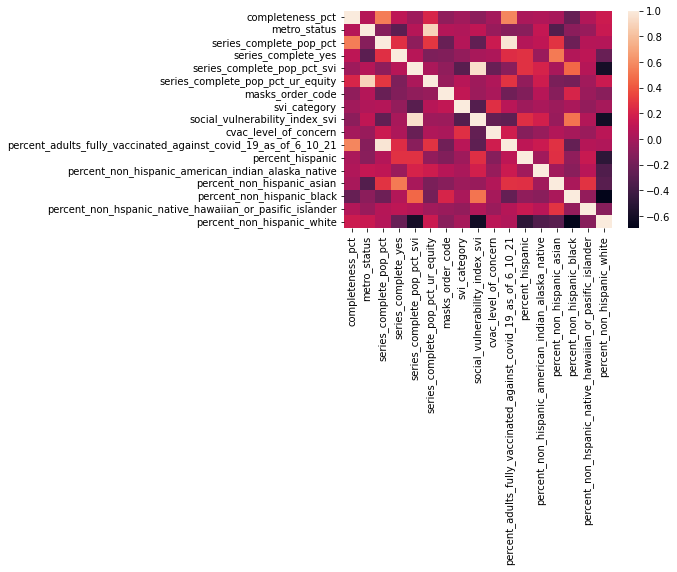

In [64]:
# Visualize the correlations
sns.heatmap(df_new.corr())

In [65]:
#Split the X and y
y = df_new['cvac_level_of_concern']
X = df_new.drop(['cvac_level_of_concern'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=5,stratify=y)

In [66]:
#Standard Scaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [67]:
#Random Forrest Classifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# predict using testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([3, 3, 0, 2, 4, 4, 3, 1, 4, 3, 3, 1, 3, 4, 2, 0, 1, 1, 1, 4, 1, 3,
       2, 4, 1, 4, 2, 3, 2, 3, 2, 4, 4, 2, 0, 1, 2, 2, 4, 4, 4, 3, 0, 3,
       2, 0, 1, 4, 4, 0, 3, 1, 1, 1, 2, 0, 4, 1, 0, 3, 1, 1, 1, 0, 2, 4,
       3, 3, 1, 0, 0, 2, 4, 4, 4, 1, 0, 0, 3, 1, 0, 4, 0, 4, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 3, 2, 1, 2, 2, 2, 3, 4, 3, 0, 2, 4,
       4, 2, 1, 3, 4, 3, 3, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 2, 2, 2, 1, 3,
       2, 4, 2, 4, 3, 2, 1, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 1, 1,
       0, 4, 1, 1, 0, 2, 2, 2, 4, 0, 4, 1, 0, 4, 2, 0, 2, 1, 4, 3, 1, 0,
       4, 3, 1, 0, 4, 4, 0, 3, 2, 2, 0, 2, 2, 2, 1, 1, 4, 0, 1, 1, 0, 1,
       2, 4, 4, 4, 4, 0, 4, 4, 2, 2, 4, 1, 4, 1, 1, 1, 1, 3, 4, 2, 2, 2,
       1, 0, 2, 4, 2, 0, 2, 0, 4, 0, 1, 3, 2, 2, 1, 1, 2, 1, 2, 4, 4, 2,
       4, 4, 1, 3, 0, 3, 1, 0, 3, 2, 4, 1, 1, 2, 0, 2, 1, 4, 4, 1, 4, 0,
       1, 1, 1, 0, 0, 0, 2, 4, 3, 1, 4, 0, 4, 0, 1, 3, 4, 1, 2, 3, 4, 4,
       2, 4, 0, 2, 2, 1, 0, 2, 0, 4, 1, 2, 0, 1, 1,

In [69]:
# Model Evaluation:

# score the model on accuracy
acc_score = accuracy_score(y_test, predictions)

# calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2","Actual 3","Acutal 4"],
    columns=["Predicted 0", "Predicted 1","Predicted 2","Predicted 3","Predicted 4"]
)

# display results
print("\n*****Mock Random Forest Model Evaluation*****")
print(f"Accuracy Score : {acc_score}")
print("---------------------------------------")
print("Confusion Matrix")
display(cm_df)
print("---------------------------------------")
print("Classification Report\n")
print(classification_report(y_test, predictions))


*****Mock Random Forest Model Evaluation*****
Accuracy Score : 0.5328671328671328
---------------------------------------
Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,72,8,27,35,2
Actual 1,3,67,34,1,50
Actual 2,30,46,63,2,13
Actual 3,35,0,3,67,1
Acutal 4,0,35,9,0,112


---------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       144
           1       0.43      0.43      0.43       155
           2       0.46      0.41      0.43       154
           3       0.64      0.63      0.64       106
           4       0.63      0.72      0.67       156

    accuracy                           0.53       715
   macro avg       0.53      0.54      0.54       715
weighted avg       0.53      0.53      0.53       715

